# Global M. bovis lineages - fetch data

* Brites paper: https://open-research-europe.ec.europa.eu/articles/1-100/v2
* Joe data: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA523164

In [1]:
import sys,os,shutil,subprocess
import glob,random
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
from snipgenie import clustering

## Brites data

In [2]:
brites=pd.read_csv('brites_table1.csv')
brites=brites.dropna(subset=['Accession_Number'])
brites.Clonal_Complex.value_counts()
c=brites.Country.value_counts()
countries=list(c[-24:].index)

In [3]:
brites = brites[~brites.Country.isin(['Ireland','United Kingdom'])]
#low quality or v large
omit = ['ERR017796','SRR7131025','SRR7131117','SRR6797355','SRR10251186','SRR7617446',
        'SRR4199188','ERR2512942','ERR3458087','SRR2101329','SRR5642718','ERR2517102']

## fetch data

In [48]:
def fetch_data(meta,col,path,omit=[]):
    for i,row in meta.iterrows():
        run = row[col]
        #print (row)
        if run in omit:
            continue
        if 'ERS' in run:
            continue
        files = glob.glob(os.path.join(path,'%s*.fastq*') %run)
        if len(files)>0:
            continue
        cmd = 'fastq-dump --split-files -O %s %s' %(path,run)
        print (run)
        print (cmd)
        try:
            subprocess.check_output(cmd, shell=True)
        except:
            print ('failed')
            continue
        f=os.path.join(path,'%s*.fastq' %run)
        cmd = 'pigz %s' %f
        print (cmd)
        subprocess.check_output(cmd, shell=True)
        

In [ ]:
path = '/storage/btbgenie/brites'
#uk = brites[brites.Country=='United Kingdom']
rare = brites[brites.Country.isin(countries)]
sub = brites.sample(40)
fetch_data(sub,'Accession_Number',path,omit)

In [6]:
'''files = glob.glob('/storage/btbgenie/mbovis_sra/*.fastq*')
for f in files:
    name=os.path.splitext(os.path.basename(f))[0].split('_')[0]
    #print (name)
    if name not in list(meta.Accession_Number):
        print (name,os.path.basename(f))
        shutil.move(f,os.path.join('/storage/btbgenie/mbovis_sra_other',os.path.basename(f)))'''

In [ ]:
samples = pd.read_csv('/storage/btbgenie/global_results/samples.csv')
x=brites[brites.Accession_Number.isin(samples['sample'])]
x.Country.value_counts()
samples

## check clustering

In [25]:
reload(clustering)
snpdist = pd.read_csv('/storage/btbgenie/global_results/snpdist.csv',index_col=0)
clusts,members = clustering.get_cluster_levels(snpdist)
clusts.snp500.value_counts()

snp500
1    335
4     36
8     13
2      7
5      5
6      3
3      3
7      2
Name: count, dtype: int64

In [26]:
clustering.nonredundant_samples(clusts, 'snp50')

,snp1000,snp500,snp200,snp50,snp20,snp12,snp7,snp3,dup
ref,1,1,4,219,219,219,219,219,219
SRR1792429,1,1,4,24,8,8,307,307,24
SRR1792051,1,1,4,47,47,47,23,352,47
SRR1791707,1,1,4,177,177,177,177,354,177
SRR1791826,1,1,4,2,222,222,222,222,2
...,...,...,...,...,...,...,...,...,...
SRR7851351,1,1,4,39,39,39,157,78,39
ERR2815600,1,1,14,120,120,120,60,30,120
SRR7851321,1,1,17,64,64,64,64,64,64
SRR7851348,1,1,35,67,67,134,67,33,67


array([[<Axes: title={'center': '0'}>]], dtype=object)

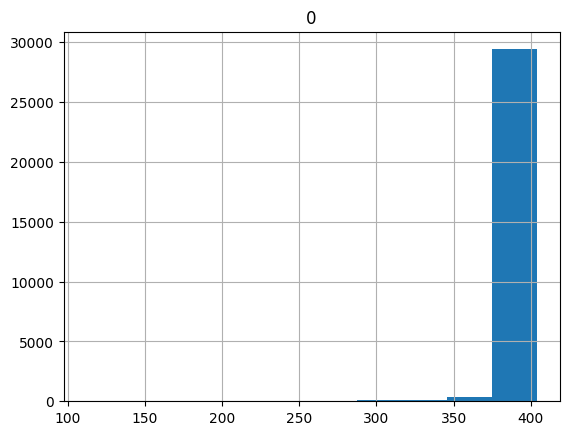

In [47]:
smat = pd.read_csv('/storage/btbgenie/global_results/core_missing.txt',sep=' ',index_col=0)
missing = smat[smat!='N'].T.count().sort_values()
x=pd.DataFrame(missing)#.reset_index()
#x.plot(x='pos',y=0,kind='scatter')
x.hist()

## Joe data

In [6]:
ukmeta = pd.read_csv('/storage/btbgenie/UK/joe_runtable.txt')

path='/storage/btbgenie/UK'
#fetch_data(ukmeta,'Run',path)

In [7]:
#check against brites for dups
ukmeta.Run
brites[brites.Accession_Number.isin(ukmeta.Run)]

,Accession_Number,Clonal_Complex,Country,Gnumber,Host,Map,SIB_Number,Sample.included.in.Loiseau.et.al..2020
